In [1]:
##Описание данных
#satisfaction_level - уровень удовлетворенности
#last_evaluation - последняя оценка
#number_project - количество проектов
#average_montly_hours - среднее число отработанных часов в месяц
#time_spend_company - стаж в компании
#Work_accident - несчастный случай на работе (флаг)
#left - увольнения (флаг)
#promotion_last_5years - повышения за последние 5 лет (флаг)
#sales - подразделение (категория)
#salary - зарплата (категория)

In [2]:
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
#task1. Загрузить файл
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#проверяем отсутствующие значения
data.isnull().sum().sum()

0

In [5]:
#task 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
from collections import Counter

#мода
print('MODA:\n')
column_list = ['satisfaction_level', 'last_evaluation', 'number_project',
               'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary'] 
for column_name in column_list:
    print(column_name, ': ', statistics.mode(data[column_name]))
    
#statistics.mode(average_montly_hours) --несколько значений с максимальной частотой
print('average_montly_hours: ', Counter(data['average_montly_hours']).most_common(1))

MODA:

satisfaction_level :  0.1
last_evaluation :  0.55
number_project :  4
time_spend_company :  3
Work_accident :  0
left :  0
promotion_last_5years :  0
sales :  sales
salary :  low
average_montly_hours:  [(135, 153)]


In [6]:
#среднее,медиана (50 percentile),мин/макс,сред.отклонение
data.describe(include = ['object', 'float', 'int64'], percentiles = [.5]) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN


In [7]:
#посмотрим на значения категориальных параметров
for column_name in ['salary', 'sales']:
    print(column_name, ': ', data[column_name].unique())

salary :  ['low' 'medium' 'high']
sales :  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


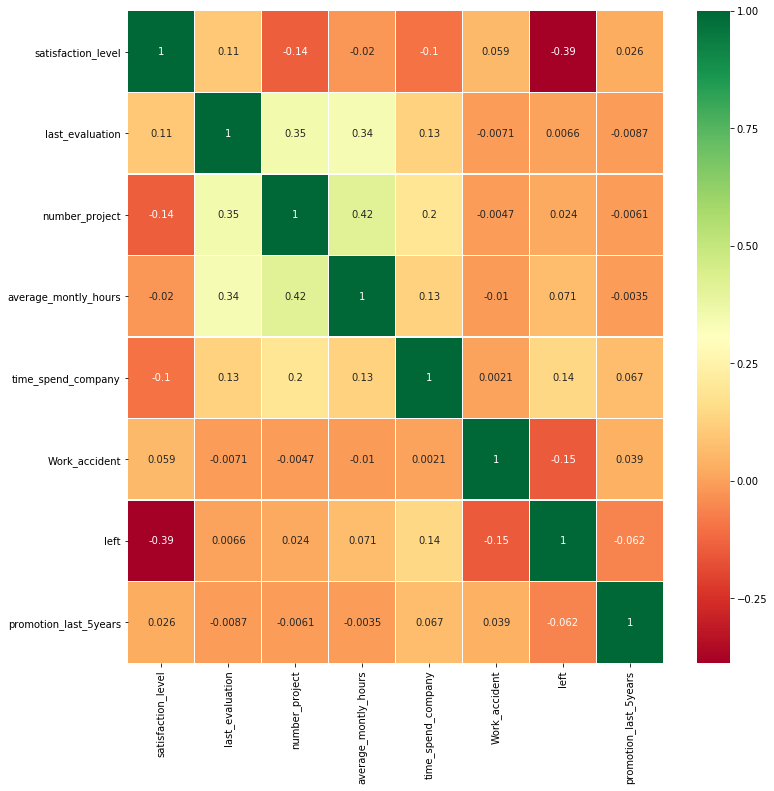

In [8]:
#task 3.Рассчитать и визуализировать корреляционную матрицу для переменных.
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [9]:
#добавим int столбец уровень зарплаты, чтобы эти данные отображались в корреляционной матрице
def salary_level(salary):
    if salary == 'low':
        return 1
    elif salary == 'medium':
        return 2
    elif salary == 'high':
        return 3
    else:
        return 0

In [10]:
data['salary_level'] = data['salary'].apply(salary_level)

In [11]:
#нормируем данные, посмотрим, поменяются ли значения в матрице + добавили новый столбец salary_level
norm_data = data.iloc[:,np.r_[:8, 10]]
headers = list(norm_data.columns.values)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(norm_data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

df_norm.columns = headers

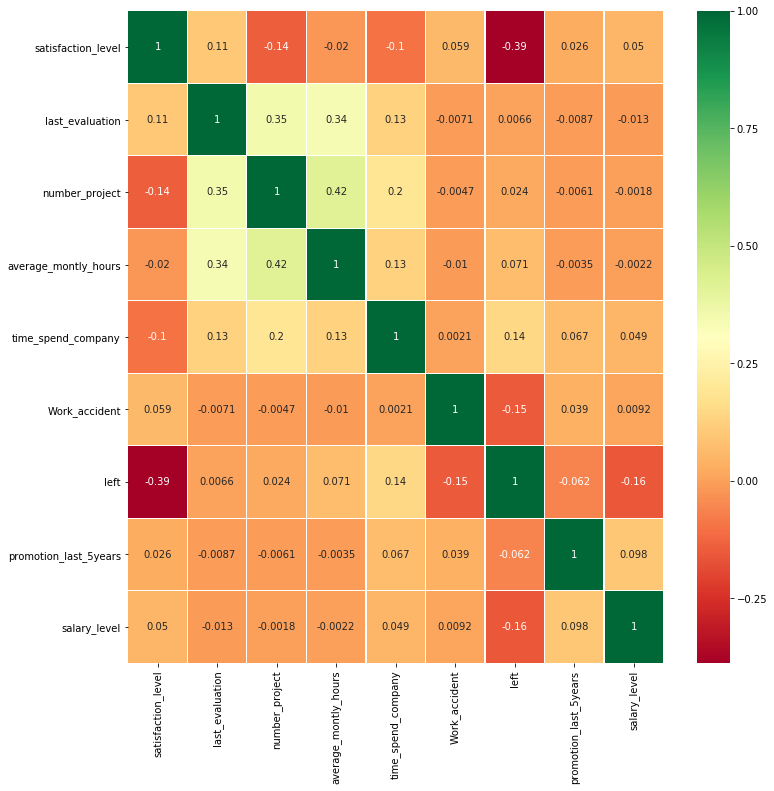

In [12]:
sns.heatmap(df_norm.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Максимальная корреляция изучаемых параметров: 
- обратная корреляция (-0,39): left и satisfaction_level (чем ниже уровень удовлетворённости, тем более высокая вероятность увольнения) 
- прямая корреляция (0,34): number_project и average_monthly_hours (чем больше проектов у сотрудника, тем больше часов в месяц он работает)

C:\Users\bns\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bns\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


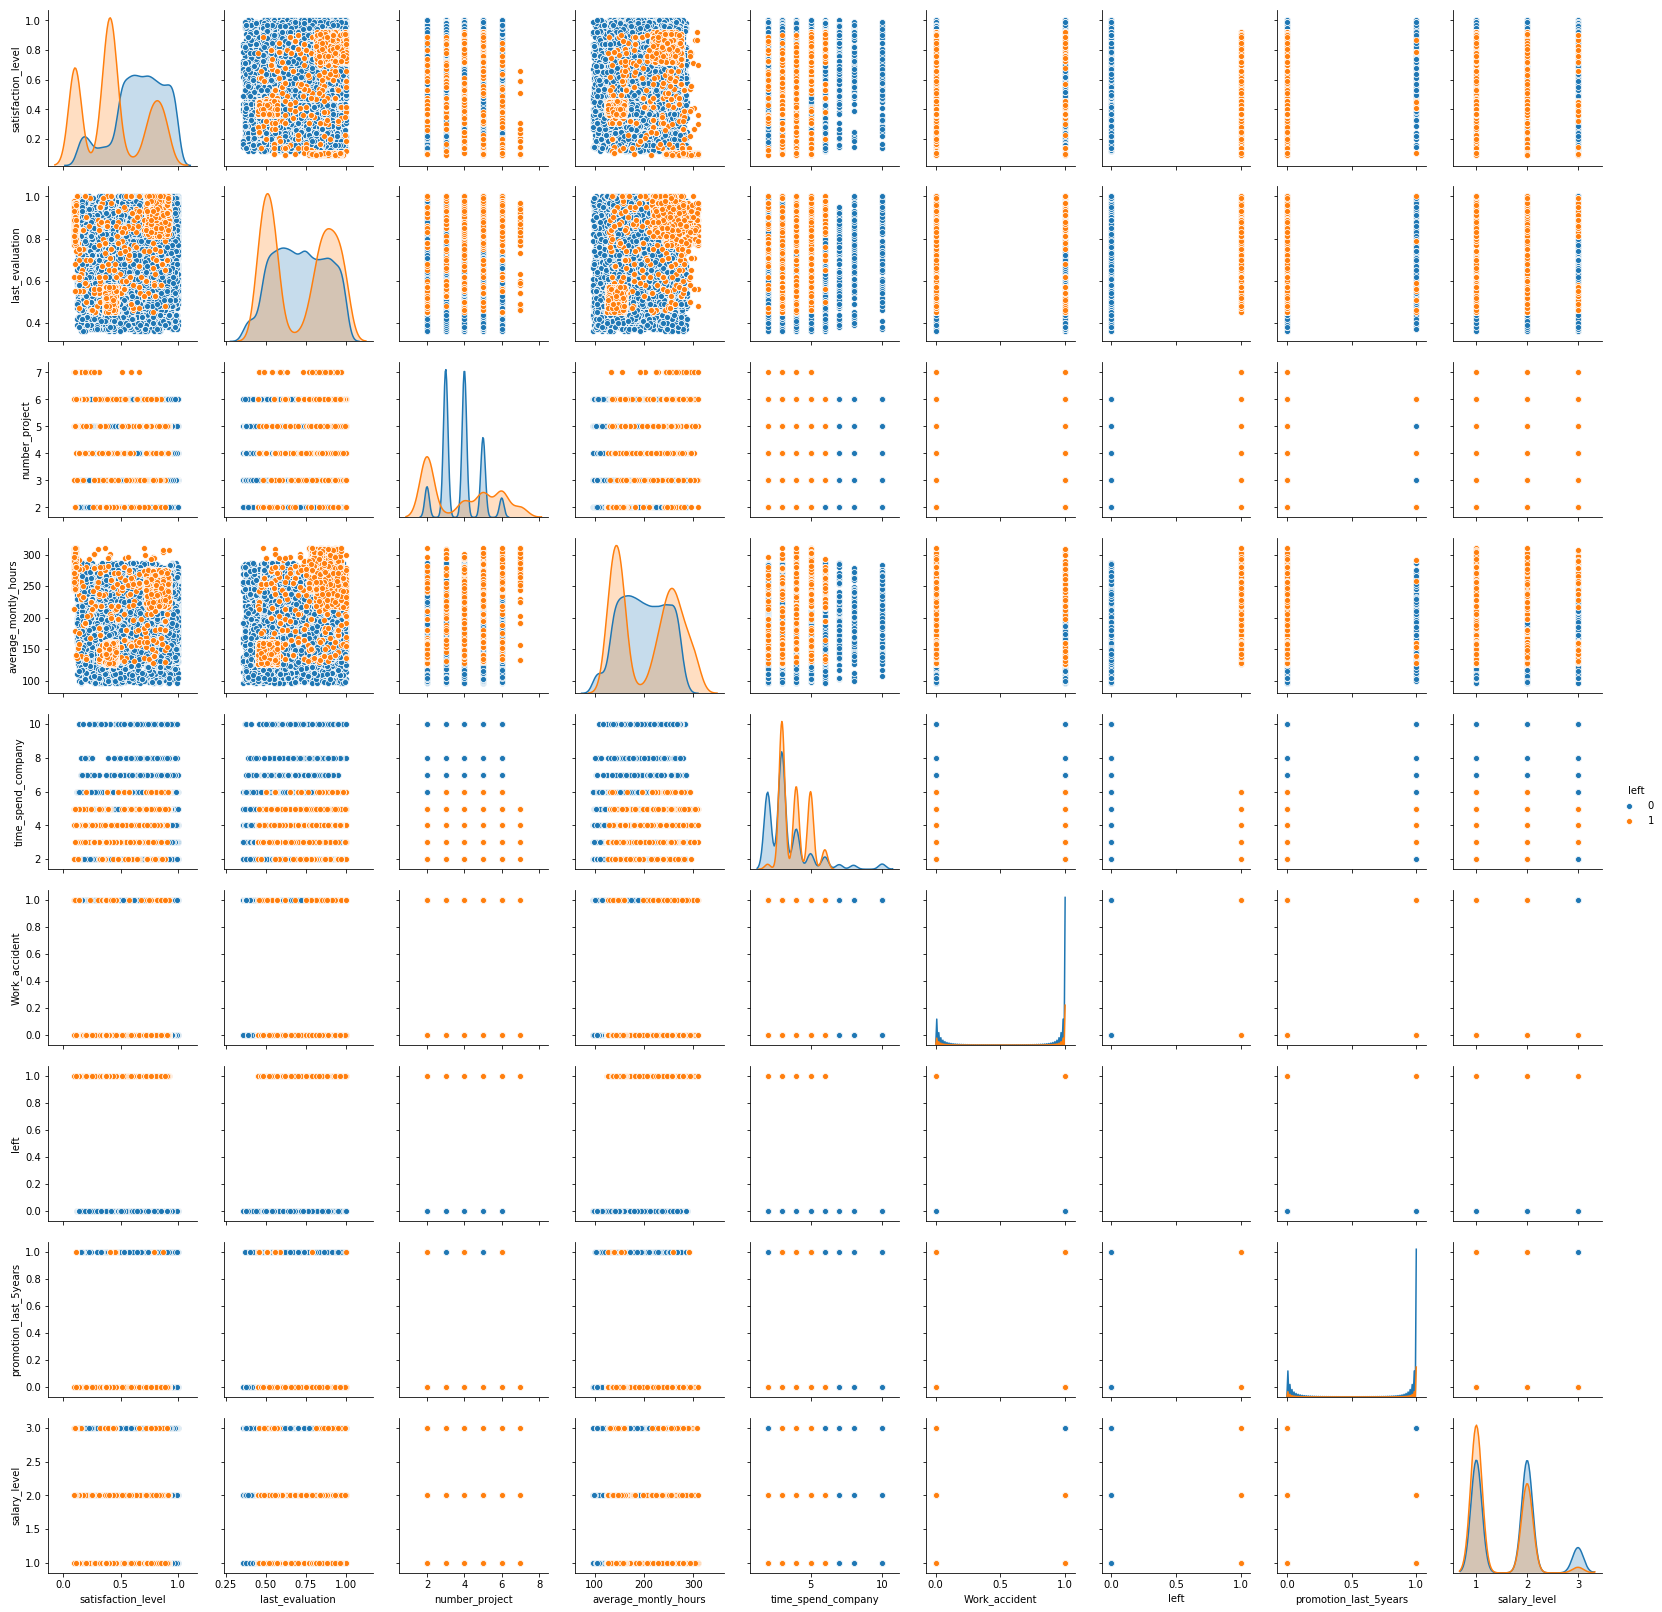

In [13]:
#4.Визуализировать несколько взаимосвязей между переменными.
#рассмотрим с учетом деления на уволившихся и работающих сотрудников (без этого условия информативность графиков довольно низкая)
fig = sns.pairplot(data=data, hue='left') 
plt.show()

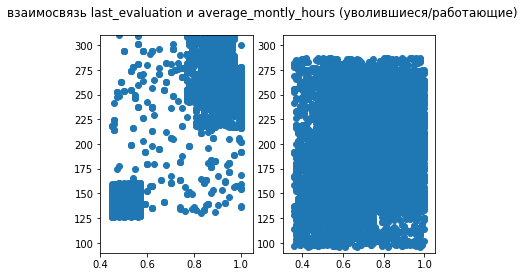

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(data[data.left == 1]['last_evaluation'], data[data.left == 1]['average_montly_hours']) 
ax2.scatter(data[data.left == 0]['last_evaluation'], data[data.left == 0]['average_montly_hours']) 
fig.suptitle('взаимосвязь last_evaluation и average_montly_hours (уволившиеся/работающие)')
ax1.set_ylim([90, 310])
ax2.set_ylim([90, 310])
plt.show()

Интересно, что большАя часть уволившихся работников много работали(>225) и были высоко оценены (>0,8), возможно, это ценные кадры для компании.

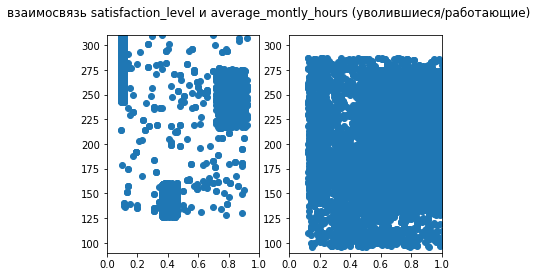

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(data[data.left == 1]['satisfaction_level'], data[data.left == 1]['average_montly_hours']) 
ax2.scatter(data[data.left == 0]['satisfaction_level'], data[data.left == 0]['average_montly_hours']) 
fig.suptitle('взаимосвязь satisfaction_level и average_montly_hours (уволившиеся/работающие)')
ax1.set_xlim([0, 1])
ax2.set_xlim([0, 1])
ax1.set_ylim([90, 310])
ax2.set_ylim([90, 310])
plt.show()

Интересно, что большАя часть уволившихся сотрудников имела высокий показатель удовлетворённости (более 0,8), и при этом довольно много работала. Стоит изучить портрет таких сотрудников или проверить способ выставления/смысл показателя satisfaction_level, т.к. довольно странно увольняться, если удовлетворён текущей работой.

In [16]:
#5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
left = data[data['left'] == 1]['average_montly_hours']
non_left = data[data['left'] == 0]['average_montly_hours']
print('ttest for left/non_left average_montly_hours: \n', stats.ttest_ind(left, non_left))

left = data[data['left'] == 1]['satisfaction_level']
non_left = data[data['left'] == 0]['satisfaction_level']
print('ttest for left/non_left satisfaction_level: \n', stats.ttest_ind(left, non_left))

ttest for left/non_left average_montly_hours: 
 Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)
ttest for left/non_left satisfaction_level: 
 Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)


По результатам ttest можно сделать вывод, что есть статистическое различие между satisfaction_level уволенных и работающих.
А так же есть статистическое отличие по average_montly_hours уволенных и работающих.

In [17]:
#task 6.Рассчитать сколько работников работает в каждом департаменте.
data.groupby("sales").size()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


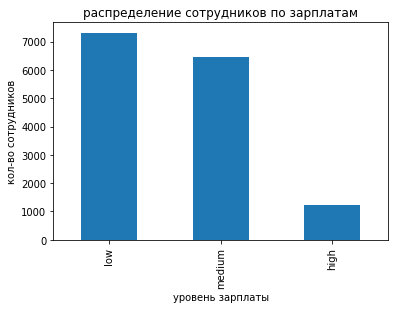

In [18]:
#task 7.Показать распределение сотрудников по зарплатам.
print(data["salary"].value_counts())

data["salary"].value_counts().plot(kind = 'bar')
plt.title("распределение сотрудников по зарплатам")
plt.xlabel("уровень зарплаты")
plt.ylabel("кол-во сотрудников")
plt.show()

In [19]:
#task 8.Показать распределение сотрудников по зарплатам совместно с департаментами.
data.groupby(["sales", "salary"])["satisfaction_level"].count()

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

sales  salary   IT  RandD  accounting   hr  management  marketing  \
0         low  609    364         358  335         180        402   
1      medium  535    372         335  359         225        376   
2        high   83     51          74   45         225         80   

sales  product_mng  sales  support  technical  
0              451   2099     1146       1372  
1              383   1772      942       1147  
2               68    269      141        201  


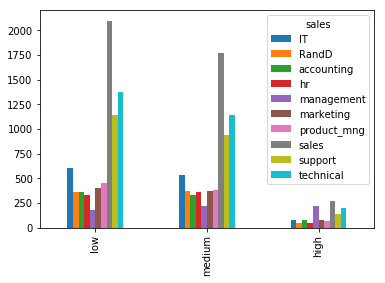

In [20]:
#визуализируем
df = data.iloc[:,7:11].groupby(["sales","salary", "salary_level"]).count().unstack("sales")
df.columns = df.columns.droplevel()
df = df.reset_index().sort_values(by=['salary_level']).reset_index(drop = True)
del df['salary_level']
print(df)
df.plot(kind = 'bar')
plt.xticks(np.arange(len(df)), df['salary'])
plt.show()

In [21]:
#task 9.Сколько сотрудников покинули компанию.
len(data[data.left == 1])

3571

In [22]:
#task 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [23]:
#добавим колонки-флаги для каждого отдела
data_sales = pd.get_dummies(data, columns=["sales"])
data_sales.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,salary_level,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,low,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,1,0,0,0,0,0,0,0,1,0,0


In [24]:
from sklearn.model_selection import train_test_split

x = data_sales.iloc[:,np.r_[:6, 7, 9:20]]
y = data_sales['left']
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 0)

No handles with labels found to put in legend.


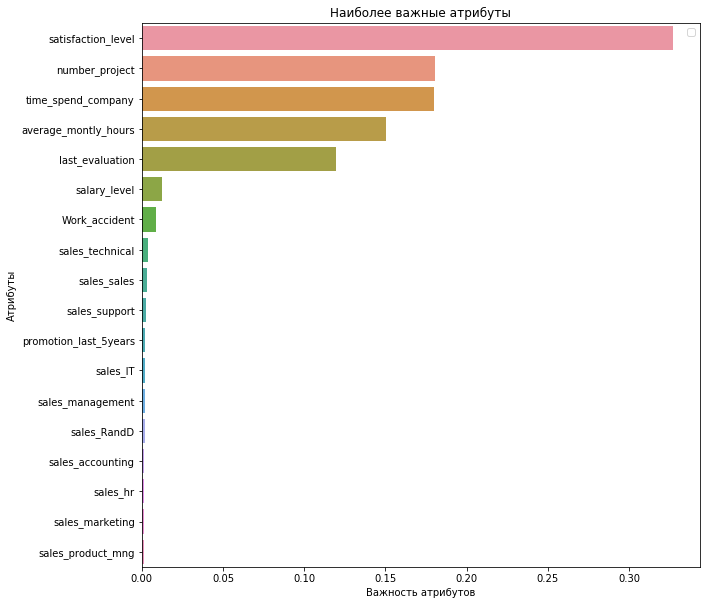

In [25]:
from sklearn.ensemble import RandomForestClassifier

column_sels = list(x.columns.values)

# создаем модель деревья решений
model_randomforest=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_randomforest.fit(X_train,y_train)

feature_imp = pd.Series(model_randomforest.feature_importances_,index=column_sels).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, model_randomforest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2299
           1       0.99      0.98      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



Качество модели получилось довольно хорошим, следовательно, ранжированию фич, влияющих на уход из компании можно доверять. В первую очередь анализируем удовлетворённость работой в компании (смотрим, как собирается параметр, можно ли детализировать недовольство, ловим тех, кто ставит оценку удовлетворенности ниже 0,5 или ранее)

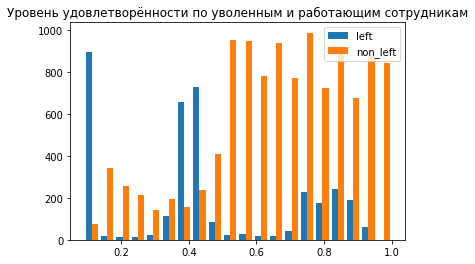

In [27]:
plt.hist([data[data.left == 1]['satisfaction_level'], data[data.left == 0]['satisfaction_level']], 20, label=['left', 'non_left'])
plt.legend(loc='upper right')
plt.title('Уровень удовлетворённости по уволенным и работающим сотрудникам')
plt.show()

Далее стоит изучить кол-во проектов на человека, получается, большое кол-во проектов так же влияет на решение об увольнении сотрудника

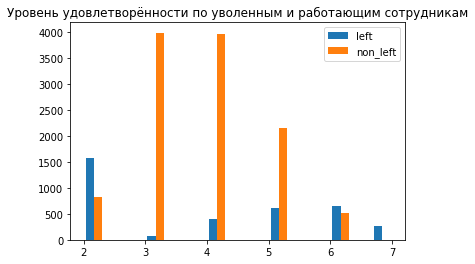

In [28]:
plt.hist([data[data.left == 1]['number_project'], data[data.left == 0]['number_project']], 15, label=['left', 'non_left'])
plt.legend(loc='upper right')
plt.title('Уровень удовлетворённости по уволенным и работающим сотрудникам')
plt.show()